# Exercise 5: Random Forest
Author: Allyson Vasquez  
  
Prompt: Develop a Simple Random Forest Model from Scratch.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bank_marketing.csv')

## A.) Look into and download the data set bank marketing.zip and understand the content.  
Use y (whether a client will subscribe to a term deposit or not) and others as x variables (there are 15 of them).

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,51,management,married,tertiary,no,6530,yes,no,unknown,5,may,91,1,-1,0,unknown,no
1,27,unemployed,married,primary,no,7459,yes,no,unknown,9,may,407,2,-1,0,unknown,no
2,59,management,divorced,primary,no,13308,yes,no,unknown,13,may,131,1,-1,0,unknown,no
3,48,technician,married,secondary,no,7373,yes,no,unknown,14,may,126,1,-1,0,unknown,no
4,51,blue-collar,married,secondary,no,7180,yes,no,unknown,14,may,927,1,-1,0,unknown,yes


This is a large dataset of a little over 35,000 people and their basic information (or variables) from a bank marketing campagin. The dataset contains 17 attributes per person in this sample population.  
`y` is a final outcome if a customer opened an account from the marketing campaign.  
The rest of the attributes, `x`, are listed below:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35134 entries, 0 to 35133
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        35134 non-null  int64 
 1   job        35134 non-null  object
 2   marital    35134 non-null  object
 3   education  35134 non-null  object
 4   default    35134 non-null  object
 5   balance    35134 non-null  int64 
 6   housing    35134 non-null  object
 7   loan       35134 non-null  object
 8   contact    35134 non-null  object
 9   day        35134 non-null  int64 
 10  month      35134 non-null  object
 11  duration   35134 non-null  int64 
 12  campaign   35134 non-null  int64 
 13  pdays      35134 non-null  int64 
 14  previous   35134 non-null  int64 
 15  poutcome   35134 non-null  object
 16  y          35134 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.6+ MB


These variables about each person can aid in determining how to make a marketing campaign more successful by studying the relationships between these variables for a given individual, and if they opened an account or not.
Below explores more about these attributes.

In [5]:
# contact represents the communication type that the bank had with the customer.
df.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [6]:
# month and day represent when the person was last contacted.
# duration is the duratioin of the communication.
df[['month','day','duration']].head(-10)

,month,day,duration
0,may,5,91
1,may,9,407
2,may,13,131
3,may,14,126
4,may,14,927
...,...,...,...
35119,nov,16,162
35120,nov,16,212
35121,nov,16,270
35122,nov,16,333


In [7]:
# poutcome is the outcome of the marketing campaign
# y is our target outcome if the person created an account of not.
df[['poutcome','y']].head(-15)

,poutcome,y
0,unknown,no
1,unknown,no
2,unknown,no
3,unknown,no
4,unknown,yes
...,...,...
35114,unknown,yes
35115,success,yes
35116,failure,no
35117,failure,yes


## B.) Identify several independent variables (x) that you think are important, say K = 5 or more, but no more than 10.  
To do this you may exercise your intuitive judgment, run a logistic regression model, or whatever supports your choice.  
(Our objective is to develop a simple model at this point, not necessarily a good one.)

In [45]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [52]:
categorical = df.select_dtypes(include='object')
categorical.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [58]:
numerical = df.select_dtypes(include='int64')
numerical.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [12]:
y_counts = df['y'].value_counts()

no     31005
yes     4129
Name: y, dtype: int64

Text(0, 0.5, 'Number of People')

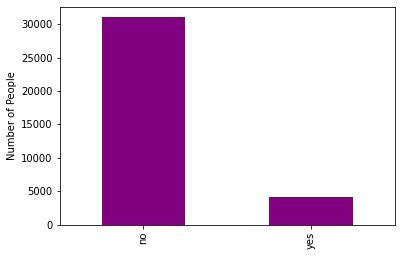

In [27]:
df['y'].value_counts().plot(kind='bar', color='purple')
plt.ylabel('Number of People')

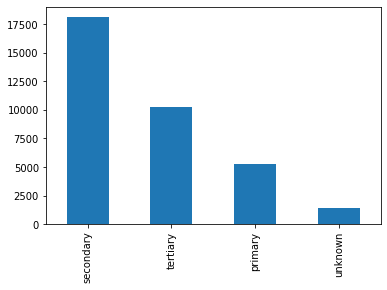

In [40]:
df["education"].value_counts().plot(kind="bar")

In [ ]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

NameError: name 'sns' is not defined

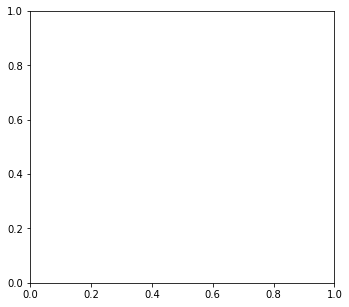

In [46]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='deposit',data=df)
plt.title("Category of Yes and No")
plt.subplot(1,2,2)
labels =df['deposit'].value_counts(sort = True).index
sizes = df['deposit'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Total yes and No categ',size = 12)
plt.show()

## C.) Clean up the data, by deletion, imputation, and/or transformation of some kind. You want record what you do.